<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Plotting_GeoMx_DEGsLMM_ShinyGoPathways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GeoMx DEGs LMM ShinyGO Pathways
#Sup Figure 6E and Sup Figure 7F

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [ ]:
arial_font_path = '/content/drive/MyDrive/arial/arial.ttf'
arial_font = fm.FontProperties(fname=arial_font_path, size=16)

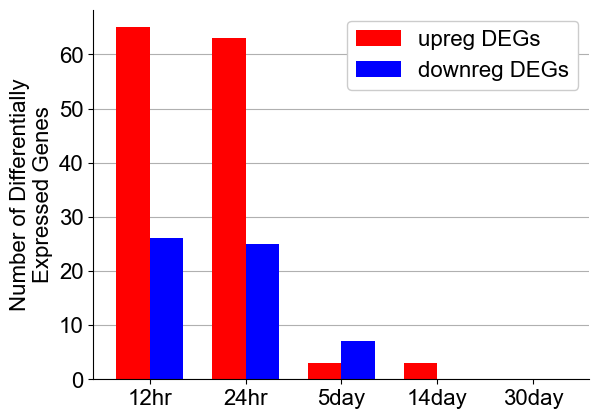

<Figure size 1920x1440 with 0 Axes>

In [ ]:
time_points = ['12hr', '24hr', '5day', '14day', '30day']
upreg_degs = [65, 63, 3, 3, 0]
downreg_degs = [26, 25, 7, 0, 0]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(time_points))
r2 = [x + bar_width for x in r1]

# Create the bar graph
plt.bar(r1, upreg_degs, color='red', width=bar_width, label='upreg DEGs')
plt.bar(r2, downreg_degs, color='blue', width=bar_width, label='downreg DEGs')

# Increase font size and set font to Arial
plt.xlabel('', fontproperties=arial_font, fontsize=16)
plt.ylabel('Number of Differentially\nExpressed Genes', fontproperties=arial_font, fontsize=16)
plt.xticks([r + bar_width / 2 for r in range(len(time_points))], time_points)


# Increase the size of x and y tick labels
plt.xticks(fontsize=16, fontproperties=arial_font)
plt.yticks(fontsize=16, fontproperties=arial_font)


# Remove top and right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Remove vertical gridlines
plt.grid(axis='y')

# Move horizontal gridlines behind the plotted data
plt.gca().set_axisbelow(True)

# Add a legend with increased font size and white background
legend = plt.legend(prop=arial_font, fontsize=16)
legend.get_frame().set_facecolor('white')  # Set background color to white
legend.get_frame().set_alpha(1.0)  # Set transparency to 1.0 (no transparency)

# Set the DPI to 300
plt.figure(dpi=300)

# Show the graph
plt.show()


# ShinyGo plotting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/GeoMx_CIP/ADM_GeoMxOverlap_GSEA_bioGO.csv')

In [ ]:
order= ['Actin filament-based proc. ',
         'Actin cytoskeleton organization ',
        'Cytoskeleton organization ',
        'Actin filament organization ',
        'Supramolecular fiber organization ',
        'Reg. of actin filament-based proc. ',
        'Reg. of actin filament organization ',
        'Reg. of supramolecular fiber organization ',
        'Reg. of organelle organization ',
        'Reg. of cytoskeleton organization ',
        'Reg. of anatomical structure size ',
        'Reg. of cellular component size ',
         'Reg. of actin filament length ',
        'Reg. of actin polymerization or depolymerization ',
        'Actin polymerization or depolymerization ',
        'Stress fiber assembly ',
        'Contractile actin filament bundle assembly ',
        'Actin filament bundle assembly ']

In [ ]:
# Reorder the dataframe
data['Pathway'] = data['Pathway'].astype('category')
data['Pathway'].cat.reorder_categories(order, ordered=True, inplace=True)
data.sort_values(by='Pathway', inplace=True)

<ipython-input-9-599e1a13cdcd>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  data['Pathway'].cat.reorder_categories(order, ordered=True, inplace=True)


In [ ]:
# Extract the required columns
path = data['Pathway']
fold_enrichment = data['Fold Enrichment']
fdr = data['Enrichment FDR']
num_genes = data['nGenes']

<ipython-input-40-78d90517fa79>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis')(normalized_values)  # Map normalized values to colors
<ipython-input-40-78d90517fa79>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('viridis'), norm=plt.Normalize(vmin=0, vmax=9))
<ipython-input-40-78d90517fa79>:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to 

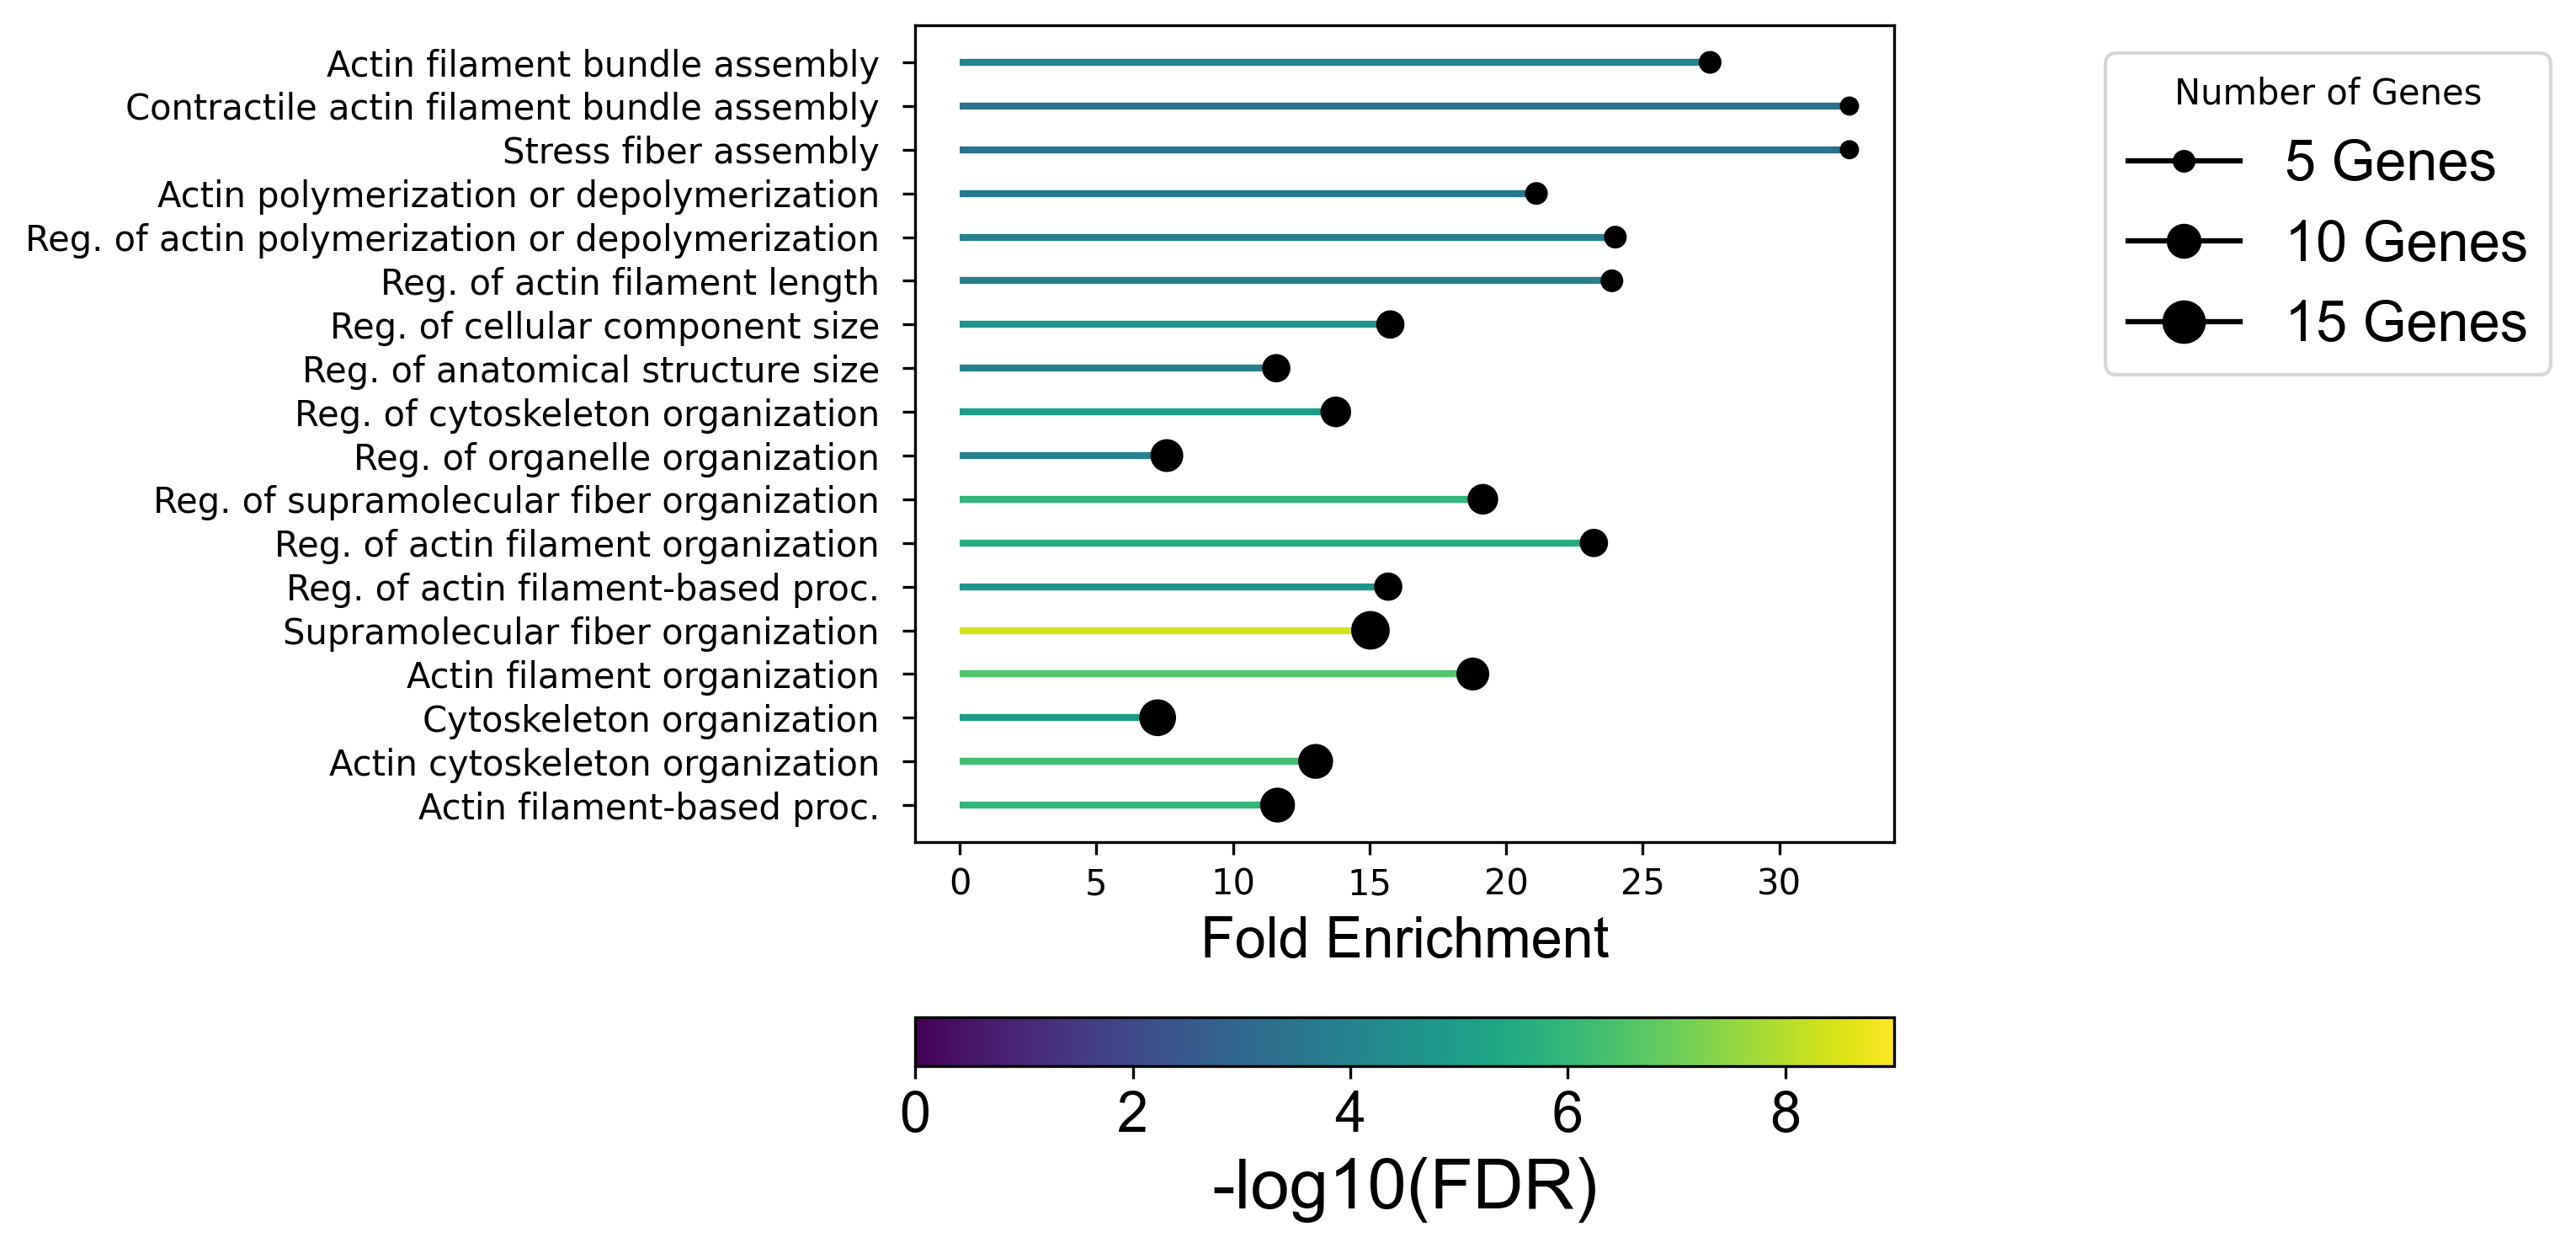

In [ ]:
# Set the font properties for Arial
arial_font_path = '/content/drive/MyDrive/arial/arial.ttf'
arial_font = fm.FontProperties(fname=arial_font_path, size=16)

# Set the color based on -log10(FDR) in the range of 0-9
normalized_values = (-np.log10(fdr)) / 9  # Normalize values to range 0-1
colors = plt.cm.get_cmap('viridis')(normalized_values)  # Map normalized values to colors

# Set the size of the dots based on num_genes (range from 2 to 15)
dot_size = (num_genes - 2) * 10  # Adjust to fit your size preferences

# Convert dot_size to numpy array
dot_size = dot_size.to_numpy()

# Create a larger figure with a DPI of 300
fig, ax = plt.subplots(figsize=(5, 6), dpi=300)

# Create the lollipop plot
ax.scatter(fold_enrichment, path, color='black', s=dot_size, zorder=2)
ax.hlines(y=path, xmin=0, xmax=fold_enrichment, colors=colors, linewidth=2, zorder=1)

# Set labels and title with Arial font
ax.set_xlabel('Fold Enrichment', fontproperties=arial_font, size=16)

# Create colorbar for -log10(FDR), make sure to associate it with the Scatter plot
sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('viridis'), norm=plt.Normalize(vmin=0, vmax=9))
sm.set_array([])
cbar = fig.colorbar(sm, orientation='horizontal')
cbar.set_label('-log10(FDR)', fontproperties=arial_font, size=20)

# Set colorbar ticks
cbar.set_ticks(np.arange(0, 10, 2))  # Include every other number
cbar.set_ticklabels(np.arange(0, 10, 2).astype(str), fontproperties=arial_font, size=16)  # Set larger tick fonts


# Create custom legend for nGenes =5, 10, 15
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='black', label='5 Genes', markersize=np.sqrt((5-2) * 10)),
    plt.Line2D([0], [0], marker='o', color='black', label='10 Genes', markersize=np.sqrt((10-2) * 10)),
    plt.Line2D([0], [0], marker='o', color='black', label='15 Genes', markersize=np.sqrt((15-2) * 10))
]

# Add the legend to the right and slightly above the plot
ax.legend(handles=legend_elements, title='Number of Genes', loc='upper right', bbox_to_anchor=(1.7, 1), prop=arial_font, fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
